In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# df2=pd.read_csv('https://drive.google.com/uc?export=download&id=1sHR0Yor1dniuTP2U29vi7joMcZ_7tXxP') # selection1
df2=pd.read_csv('https://drive.google.com/uc?export=download&id=1kLklmrN19K7tLm0RGG5slUrKsQE4cHah')

In [ ]:
df2.drop(columns=['Florida', 'Idaho', 'Indiana', 'Maine', 'Nevada', 'Oregon',
       'Rhode Island', 'South Carolina', 'Utah', 'Vermont', 'Virginia',
       'Wisconsin', 'DECIDE'], axis=1, inplace=True)

In [ ]:
class_mapping = {'No CD': 0, 'Mild CD': 1, 'Moderate CD': 2, 'Severe CD': 3}
df2['Class'] = df2['Class'].replace(class_mapping)

In [ ]:
df2.Class.value_counts()

Class
0    57198
1     3710
2     2075
3      900
Name: count, dtype: int64

In [ ]:
X = df2.iloc[:, :-2]
y = df2.iloc[:, -1]

In [ ]:
# data = np.column_stack((X, y))

# # Separate majority and minority classes
# majority_class = data[data[:, -1] == 0]  # Assuming label 0 represents the majority class
# minority_class = data[data[:, -1] == 1]

# # Downsample the majority class to match the size of the minority class
# # Randomly select samples without replacement
# np.random.shuffle(majority_class)
# downsampled_majority = majority_class[:len(minority_class)]

# # Combine downsampled majority class and minority class
# balanced_data = np.vstack((downsampled_majority, minority_class))

# # Shuffle the balanced data
# np.random.shuffle(balanced_data)

# # Separate features and labels again
# X_balanced = balanced_data[:, :-1]
# y_balanced = balanced_data[:, -1]

# X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

logreg = LogisticRegression(penalty='l2', tol=0.0001, C=0.1, max_iter=10000)
scores = cross_val_score(logreg, X_train, y_train, cv=10)

print("Cross-Validation Scores:", scores)



Cross-Validation Scores: [0.89512815 0.89473684 0.89551947 0.89219331 0.89473684 0.89454119
 0.89608611 0.89412916 0.89589041 0.89491194]


In [ ]:
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Mean Accuracy: 0.894787341373753
Standard Deviation: 0.001039189220370089


In [ ]:
logreg.fit(X_train, y_train)

test_predictions = logreg.predict(X_test)

test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8950457853956327


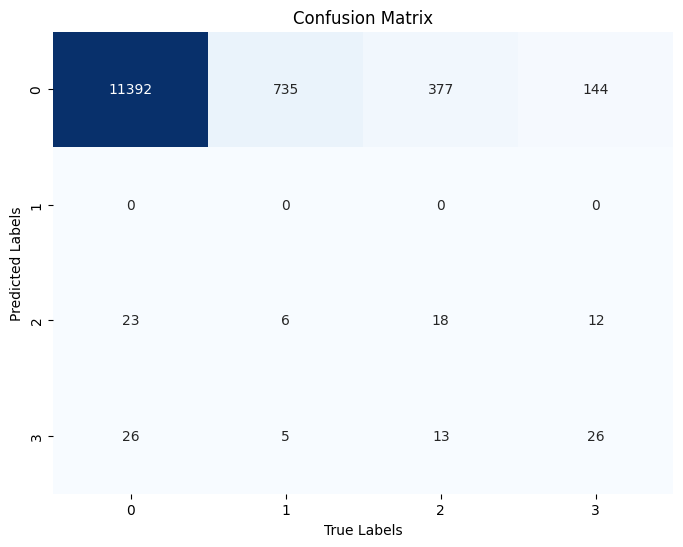

In [ ]:
conf_matrix = confusion_matrix(test_predictions, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report_lr = classification_report(y_test, test_predictions)
print("Classification Report:")
print(report_lr)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     11441
           1       0.00      0.00      0.00       746
           2       0.31      0.04      0.08       408
           3       0.37      0.14      0.21       182

    accuracy                           0.90     12777
   macro avg       0.39      0.30      0.31     12777
weighted avg       0.82      0.90      0.85     12777



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sep


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFC = RandomForestClassifier(n_estimators=10, random_state=42, )

RFC.fit(X_train, y_train)

predictions = RFC.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.7164827816783684


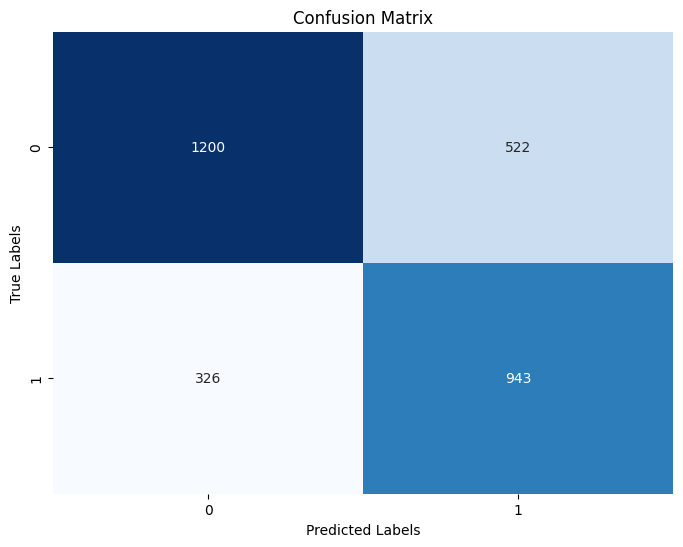

In [ ]:
conf_matrix = confusion_matrix(predictions, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

logistic_regression = LogisticRegression(penalty='l2', tol=0.0001, C=0.1)

logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
test_predictions = logistic_regression.predict(X_test)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.7425610163824807


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logistic_regression.coef_

array([[ 2.81189075e-01,  7.57619486e-02,  4.37339818e-03,
        -1.11959683e-03,  7.37782595e-02, -3.35133084e-02,
        -2.67728671e-03,  1.14112172e-01, -1.17006362e-03,
        -1.78489009e-01, -3.20802680e-02, -7.42792128e-03,
        -3.07330634e-02,  6.27599017e-02,  2.41646139e-03,
         3.41691409e-02,  1.30046401e-02, -5.38362454e-02,
         1.94695614e-02, -5.22427186e-03,  1.86172595e-01,
         2.28786007e-01, -6.56371673e-02, -7.89124679e-02,
        -6.53528253e-03, -1.83439148e-02, -9.31780625e-02,
         2.54955363e-02,  9.74750021e-03,  8.34338440e-03,
        -1.53920504e-01,  4.90167928e-02,  4.49640808e-01,
        -5.52801293e-03,  2.33926315e-02,  7.06150801e-04,
        -1.51998778e-01,  7.47182408e-03, -1.75644934e-02,
         1.94709776e-03, -9.67459914e-03,  3.38484161e-03,
        -6.64943837e-02, -5.08494393e-03,  2.22840991e-01,
         4.19009930e-01,  2.22520379e-01,  1.36754198e+00,
         2.89392616e-01,  1.33542989e-01,  1.48230278e-0

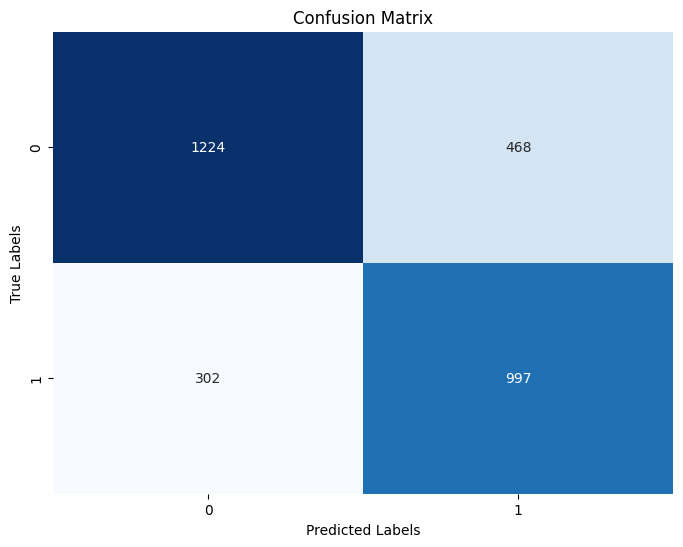

In [ ]:
conf_matrix = confusion_matrix(test_predictions, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### balanced

In [ ]:
df=pd.read_csv('https://drive.google.com/uc?export=download&id=1sHR0Yor1dniuTP2U29vi7joMcZ_7tXxP') # selection1

In [ ]:
df.drop(columns=['Florida', 'Idaho', 'Indiana', 'Maine', 'Nevada', 'Oregon',
       'Rhode Island', 'South Carolina', 'Utah', 'Vermont', 'Virginia',
       'Wisconsin', 'DECIDE'], axis=1, inplace=True)

In [ ]:
df

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PERSDOC3,CHECKUP1,EXERANY2,CVDINFR4,Insur_CHIP,Insur_Employer/Union,...,no_of_cancers_Three_or_more,no_of_cancers_Two,SLEPTIM1,WEIGHT2,HEIGHT3,CNCRAGE,_AGE80,_DRNKWK2,y_sum,y_binary
0,1,2,0,0,1,1,1,0,0,0,...,0,0,8.0,63.502880,1.8034,0.0,79.0,2.300000e-01,5.0,1
1,0,2,0,0,1,3,1,0,0,0,...,0,0,6.0,77.110640,1.5748,0.0,62.0,5.397605e-81,0.0,0
2,1,3,4,0,2,1,1,0,0,0,...,0,0,7.0,82.985907,1.6764,0.0,79.0,2.300000e-01,4.0,1
3,1,1,0,0,1,1,1,0,0,0,...,0,0,8.0,77.110640,1.7780,0.0,80.0,5.397605e-81,0.0,0
4,1,4,1,3,1,1,1,1,0,0,...,0,0,7.0,102.058200,1.7780,0.0,68.0,4.700000e-01,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64417,0,2,0,0,1,1,0,0,0,0,...,0,0,8.0,82.985907,1.6256,45.0,71.0,5.397605e-81,0.0,0
64418,0,5,30,30,1,1,0,0,0,0,...,0,0,7.0,83.914520,1.5748,0.0,59.0,9.300000e-01,0.0,0
64419,0,2,2,0,1,1,0,0,0,0,...,0,0,7.0,83.914520,1.6764,0.0,68.0,1.000000e+00,0.0,0
64420,0,2,0,0,2,1,1,0,0,1,...,1,0,8.0,76.203456,1.6764,50.0,62.0,3.500000e+00,5.0,1


In [ ]:
class_mapping = {0: 0, 1: 1, 2: 1,3: 1}
df['y_binary'] = df['y_binary'].replace(class_mapping)

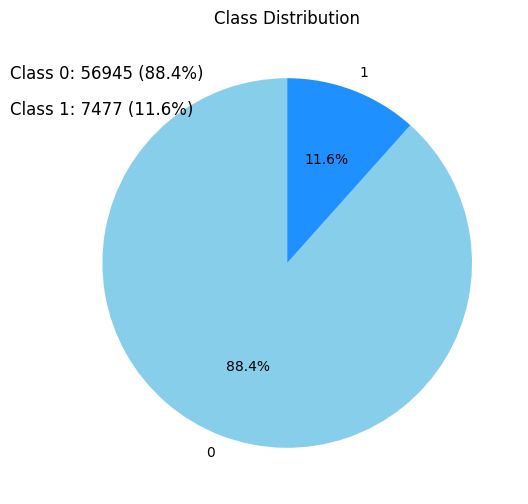

In [ ]:
class_counts = df['y_binary'].value_counts()
class_percentages = class_counts / len(df) * 100

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors = ['#87CEEB', '#1E90FF'])
plt.title('Class Distribution')
plt.text(-1.5, 1, f"Class 0: {class_counts[0]} ({class_percentages[0]:.1f}%)", fontsize=12)
plt.text(-1.5, 0.8, f"Class 1: {class_counts[1]} ({class_percentages[1]:.1f}%)", fontsize=12)
plt.show()

In [ ]:
majority_class = df[df['y_binary'] == 0.0]  # Assuming label 0 represents the majority class
minority_class = df[df['y_binary'] == 1.0]

downsampled_majority = majority_class.sample(n=len(minority_class), replace=False, random_state=42)
balanced_data = pd.concat([downsampled_majority, minority_class])



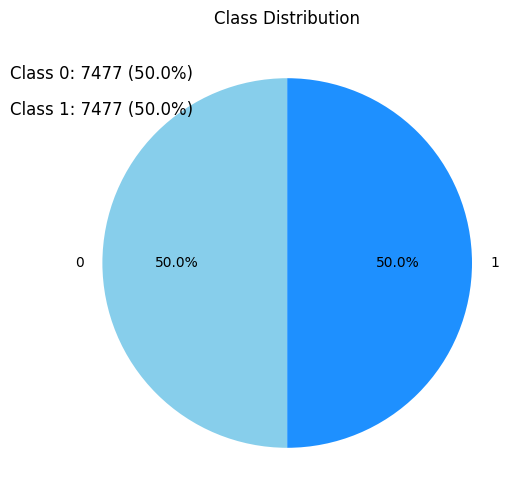

In [ ]:
class_counts = balanced_data['y_binary'].value_counts()
class_percentages = class_counts / len(balanced_data) * 100

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors = ['#87CEEB', '#1E90FF'])
plt.title('Class Distribution')
plt.text(-1.5, 1, f"Class 0: {class_counts[0]} ({class_percentages[0]:.1f}%)", fontsize=12)
plt.text(-1.5, 0.8, f"Class 1: {class_counts[1]} ({class_percentages[1]:.1f}%)", fontsize=12)
plt.show()

In [ ]:
X = balanced_data.iloc[:, :-2]
y = balanced_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFC = RandomForestClassifier(n_estimators=70, random_state=42)

RFC.fit(X_train, y_train)

predictions = RFC.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7315279170845871


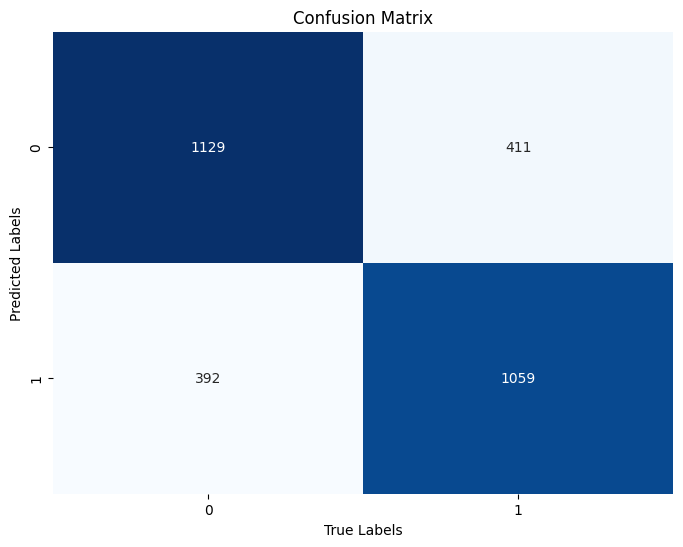

In [ ]:
conf_matrix = confusion_matrix(predictions, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tabulate import tabulate

report = classification_report(y_test, predictions, target_names=['Class 0', 'Class 1'])
print("Classification Report (Random Forest):")
print(report)


Classification Report (Random Forest):
              precision    recall  f1-score   support

     Class 0       0.73      0.74      0.74      1521
     Class 1       0.73      0.72      0.73      1470

    accuracy                           0.73      2991
   macro avg       0.73      0.73      0.73      2991
weighted avg       0.73      0.73      0.73      2991



In [ ]:
logistic_regression = LogisticRegression(penalty='l2', C=0.001)

logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
test_predictions = logistic_regression.predict(X_test)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7168171180207289


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


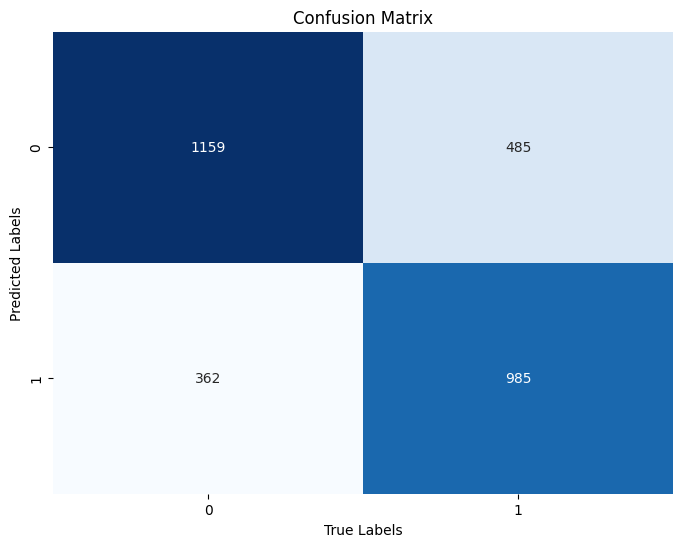

In [ ]:
conf_matrix = confusion_matrix(test_predictions, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tabulate import tabulate

report = classification_report(y_test, test_predictions, target_names=['Class 0', 'Class 1'])
print("Classification Report (Logistic Regression):")
print(report)

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

     Class 0       0.70      0.76      0.73      1521
     Class 1       0.73      0.67      0.70      1470

    accuracy                           0.72      2991
   macro avg       0.72      0.72      0.72      2991
weighted avg       0.72      0.72      0.72      2991

